In [1]:
import numpy as np
import scipy as sp
from pandas import DataFrame,Series
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
sns.set(style='white',color_codes=True)

In [2]:
train_ = pd.read_csv('./train.csv')
test_ = pd.read_csv('./test.csv')
combine = ['train_','test_']

In [12]:
#欠損値データ
train_.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
train_[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


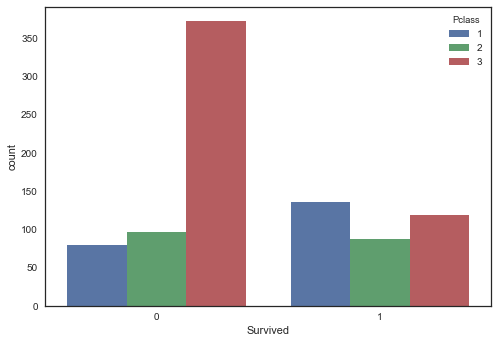

In [26]:
sns.countplot('Survived',data=train_,hue='Pclass')

In [28]:
train_[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


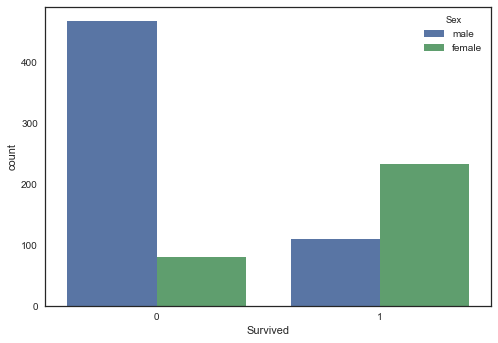

In [27]:
sns.countplot('Survived',data=train_,hue='Sex')

＃Kaggle Titanic-data-science-solutions参考
#Creating
1.ParchとSibSpを使って、新しいFeatureの作成を試みる
2.Nameを深掘り、敬称から新しいFeature作成を試みる
3.Age Bands
4.Fare Range

＃Classifying
1.Woman（Sex=female)は生存可能性が高い
2.子ども（＜Age?）の生存可能性も同じく高い
3.Pclssが高い乗客の生存可能性も高い

In [33]:
#Consider Pclass for train_
train_['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

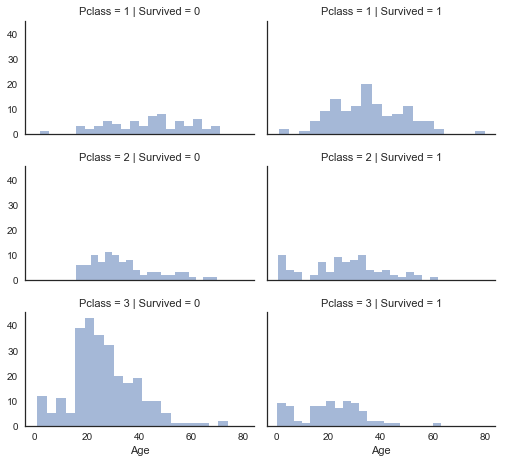

In [34]:
grid = sns.FacetGrid(train_,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

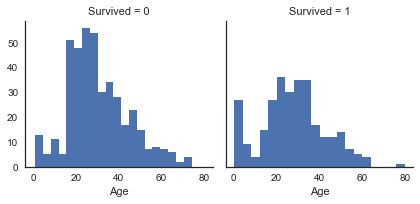

In [35]:
#Consider Age for train_
g = sns.FacetGrid(train_,col='Survived')
g.map(plt.hist,'Age',bins=20)

Creating New Features

In [3]:
train_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_ = train_.drop(['Ticket','Cabin'],axis=1)
test_ = test_.drop(['Ticket','Cabin'],axis=1)
combine = [train_,test_]

In [7]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_['Title'], train_['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [101]:
#create AgeBand and determine correlations with Surveived
labels = ["{0} - {1}".format(i,i+9) for i in range(0,80,10)]
train_['AgeBand'] = pd.cut(train_['Age'],np.arange(0,81,10),
           labels=labels)
#c.value_counts(sort=False).plot(kind='bar')
train_[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending='True')

,AgeBand,Survived
0,0 - 9,0.593750
1,10 - 19,0.382609
2,20 - 29,0.365217
3,30 - 39,0.445161
4,40 - 49,0.383721
5,50 - 59,0.404762
6,60 - 69,0.235294
7,70 - 79,0.200000


In [104]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 9,'Age'] = 0
    dataset.loc[(dataset['Age'] > 9) & (dataset['Age'] <= 29),'Age'] = 1
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 59),'Age'] = 2
    dataset.loc[dataset['Age'] > 59,'Age']
train_.head()

AttributeError: 'str' object has no attribute 'loc'

In [77]:
#delete any rows which no needs
train_df = train_.drop(['Name','Ticket','Fare','Cabin','Parch','SibSp','PassengerId'],axis=1)

In [5]:
#NaN行を削除
train_df = train_df.dropna()

In [6]:
#Ageの欠損を埋める
train_df = train_df.fillna(train_df.median())

In [7]:
train_df['gender'] = train_df['Sex'].map({'female':0,'male':1}).astype(int)
train_df['embarked'] = train_df['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [8]:
train_df = train_df.drop(['Embarked','Sex'],axis=1)

In [9]:
#テストデータの欠損値を調べる
test_.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
ids = test_['PassengerId'].values
test_df = test_.drop(['PassengerId','Name','Ticket','Fare','Cabin','Parch','SibSp'],axis=1)

In [11]:
test_df['gender'] = test_df['Sex'].map({'female':0,'male':1}).astype(int)
test_df['embarked'] = test_df['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [12]:
test_df = test_df.fillna(test_df.median())

In [13]:
test_df = test_df.drop(['Embarked','Sex'],axis=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import csv as csv

In [15]:
#Data Split
X = train_df
Y = test_df
model = LogisticRegression()
X_all = train_df.drop('Survived',axis=1)
y_all = train_df['Survived']

In [16]:
#Splitting up the Training Data
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size=0.2,random_state=50)

In [17]:
#X.drop('Survived',axis=1)=X.value[0::,1::] X['Survived'] = X.value[0::,0]
output = model.fit(X_train,y_train)

In [18]:
print('train_result:',output.score(X_train,y_train))
print('test_result:',output.score(X_test,y_test))

train_result: 0.79086115993
test_result: 0.811188811189


In [19]:
#predict the Actual test Data
predicstions = model.predict(test_df)

output = pd.DataFrame({'PassengerId' : ids,'Survived': predicstions})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [20]:
#make csv
submit_file = open('titanic_submit.csv','w')
file_object = csv.writer(submit_file)
file_object.writerow(["PassengerId","Survived"])
file_object.writerows(zip(ids,predicstions))
submit_file.close()